## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os  # Provides a way to interact with the operating system (e.g., file handling, environment variables)


In [41]:
os.listdir(r"Datasets/")

['Uber-Jan-Feb-FOIL.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [42]:
uber_15 = pd.read_csv(r"Datasets/uber-raw-data-janjune-15_sample.csv")

In [6]:
uber_15.shape

(100000, 4)

In [43]:
uber_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-02 21:43:00,B02764,237
1,B02682,2015-01-20 19:52:59,B02682,231
2,B02617,2015-03-19 20:26:00,B02617,161
3,B02764,2015-04-10 17:38:00,B02764,107
4,B02764,2015-03-23 07:03:00,B00111,140


## Data pre-processing/Data cleaning 

In [31]:
uber_15.duplicated().sum()

np.int64(54)

so, there are 54 duplicate values

In [44]:
uber_15.drop_duplicates(inplace=True)

In [45]:
uber_15.duplicated().sum()

np.int64(0)

In [46]:
uber_15.isnull().sum()

Dispatching_base_num       0
Pickup_date                0
Affiliated_base_num     1116
locationID                 0
dtype: int64

There are missing values in Affiliated base num (1116)

In [47]:
uber_15.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [48]:
uber_15["Pickup_date"]= pd.to_datetime(uber_15["Pickup_date"])

In [49]:
uber_15.dtypes

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                       int64
dtype: object

## Which month have max. Uber pickups in New York City ?

In [50]:
uber_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-02 21:43:00,B02764,237
1,B02682,2015-01-20 19:52:59,B02682,231
2,B02617,2015-03-19 20:26:00,B02617,161
3,B02764,2015-04-10 17:38:00,B02764,107
4,B02764,2015-03-23 07:03:00,B00111,140


In [51]:
uber_15['month']=uber_15["Pickup_date"].dt.month_name()

In [52]:
uber_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month
0,B02617,2015-05-02 21:43:00,B02764,237,May
1,B02682,2015-01-20 19:52:59,B02682,231,January
2,B02617,2015-03-19 20:26:00,B02617,161,March
3,B02764,2015-04-10 17:38:00,B02764,107,April
4,B02764,2015-03-23 07:03:00,B00111,140,March


<Axes: xlabel='month', ylabel='count'>

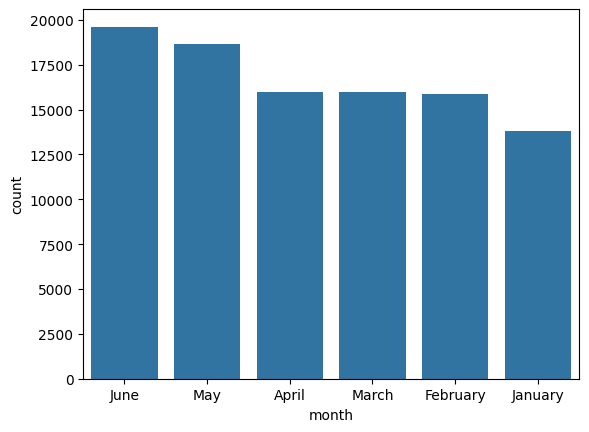

In [53]:
sns.barplot(uber_15["month"].value_counts())

June seems to have maximum uber pickups

In [54]:
## extracting dervied features (weekday ,day ,hour ,month ,minute) from 'Pickup_date'..

uber_15['weekday'] = uber_15['Pickup_date'].dt.day_name()
uber_15['day'] = uber_15['Pickup_date'].dt.day
uber_15['hour'] = uber_15['Pickup_date'].dt.hour
uber_15['minute'] = uber_15['Pickup_date'].dt.minute

In [55]:
uber_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,weekday,day,hour,minute
0,B02617,2015-05-02 21:43:00,B02764,237,May,Saturday,2,21,43
1,B02682,2015-01-20 19:52:59,B02682,231,January,Tuesday,20,19,52
2,B02617,2015-03-19 20:26:00,B02617,161,March,Thursday,19,20,26
3,B02764,2015-04-10 17:38:00,B02764,107,April,Friday,10,17,38
4,B02764,2015-03-23 07:03:00,B00111,140,March,Monday,23,7,3


In [58]:
pivot= pd.crosstab(index=uber_15["month"],columns=uber_15["weekday"])

In [59]:
pivot

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
April,2365,1833,2508,2052,2823,1880,2521
February,2655,1970,2550,2183,2396,2129,2013
January,2508,1353,2745,1651,2378,1444,1740
June,2793,2848,3037,2485,2767,3187,2503
March,2465,2115,2522,2379,2093,2388,2007
May,3262,1865,3519,2944,2627,2115,2328


In [62]:
pivot = pivot.reindex(["January", "February", "March", "April", "May", "June"])  # Sort months
pivot = pivot[["Saturday", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]]  # Sort weekdays

In [63]:
pivot

weekday,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday
month,,,,,,,
January,2745,1651,1353,1444,1740,2378,2508
February,2550,2183,1970,2129,2013,2396,2655
March,2522,2379,2115,2388,2007,2093,2465
April,2508,2052,1833,1880,2521,2823,2365
May,3519,2944,1865,2115,2328,2627,3262
June,3037,2485,2848,3187,2503,2767,2793


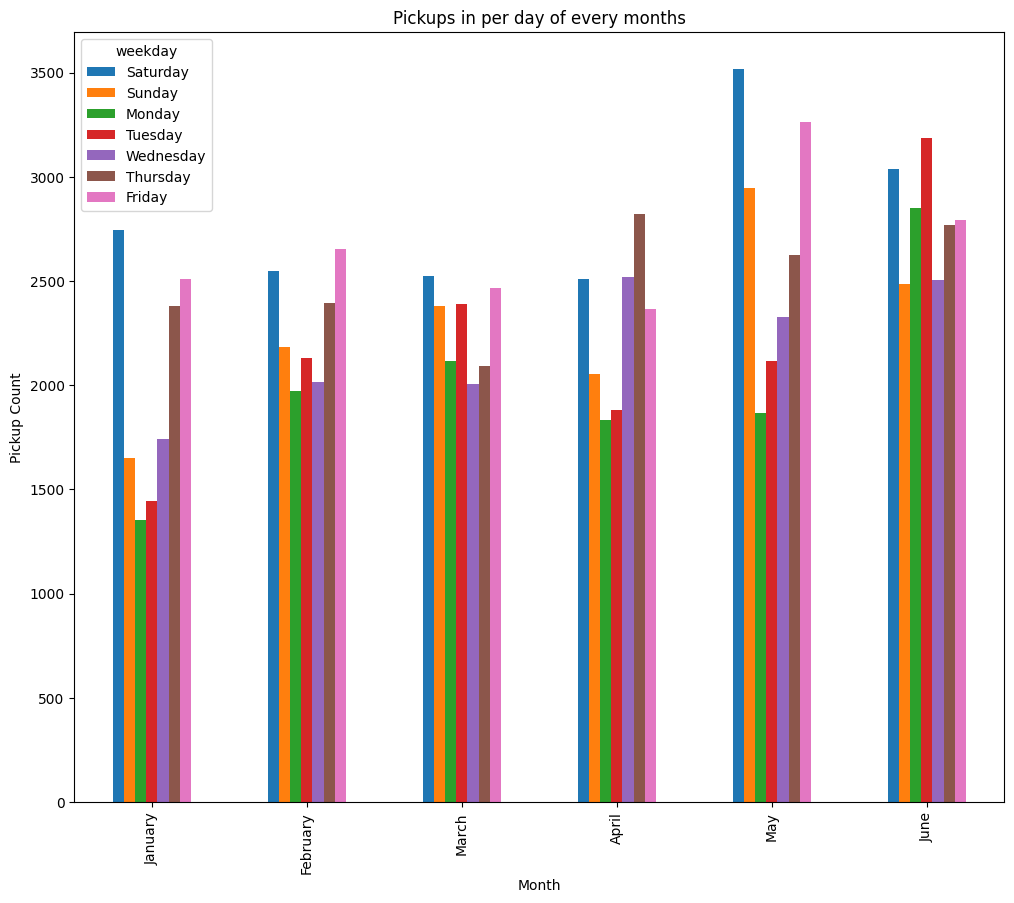

In [78]:
pivot.plot(kind='bar' , figsize=(12,10))
plt.xlabel('Month')  # Customize label
plt.ylabel('Pickup Count')  # Customize label
plt.title('Pickups in per day of every months')  # Customize title

plt.show()

On Saturday & Friday, we are getting more Uber pickups in each month , it seems that New Yorkers used to go for 
shopping , Malls , fun activities alot on these days

## Find out Hourly Rush in New york city on all days

In [79]:
temp_pivot= pd.crosstab(index=uber_15["weekday"],columns=uber_15["hour"])

In [80]:
temp_pivot

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
Friday,581,333,197,138,161,221,354,547,721,734,...,629,688,760,973,1109,1203,1182,1013,1108,1210
Monday,339,178,109,100,139,238,349,512,684,659,...,514,566,617,747,822,835,725,746,638,478
Saturday,1034,679,509,356,247,170,191,231,329,419,...,671,663,880,1005,1082,1189,1128,1129,1199,1291
Sunday,1115,887,620,436,290,190,172,193,253,338,...,716,701,733,812,743,711,697,615,658,569
Thursday,483,248,181,112,142,183,354,542,695,700,...,555,688,777,972,1166,1095,1092,1059,1041,943
Tuesday,342,178,94,62,102,179,328,549,689,702,...,513,599,696,849,1031,1037,897,920,802,657
Wednesday,343,232,103,64,97,173,320,543,684,673,...,541,589,658,818,993,1044,897,949,900,669


In [85]:
summary = uber_15.groupby(['weekday' , 'hour'] , as_index=False).size()

In [86]:
summary

,weekday,hour,size
0,Friday,0,581
1,Friday,1,333
2,Friday,2,197
3,Friday,3,138
4,Friday,4,161
...,...,...,...
163,Wednesday,19,1044
164,Wednesday,20,897
165,Wednesday,21,949
166,Wednesday,22,900


<Axes: xlabel='hour', ylabel='size'>

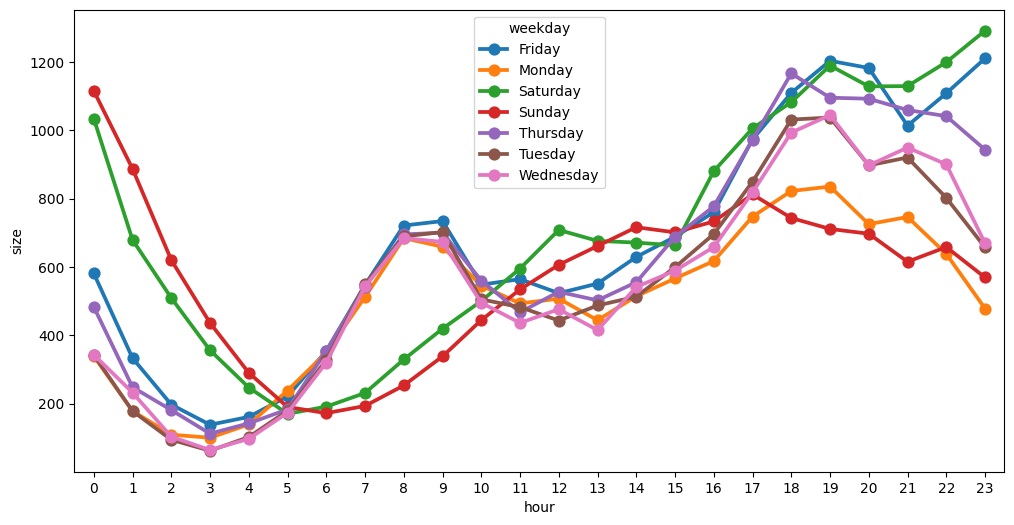

In [96]:
## pointplot between 'hour' & 'size' for all the weekdays..

plt.figure(figsize=(12,6))
sns.pointplot(x="hour" , y="size" , hue="weekday" , data=summary)

<Axes: xlabel='hour', ylabel='size'>

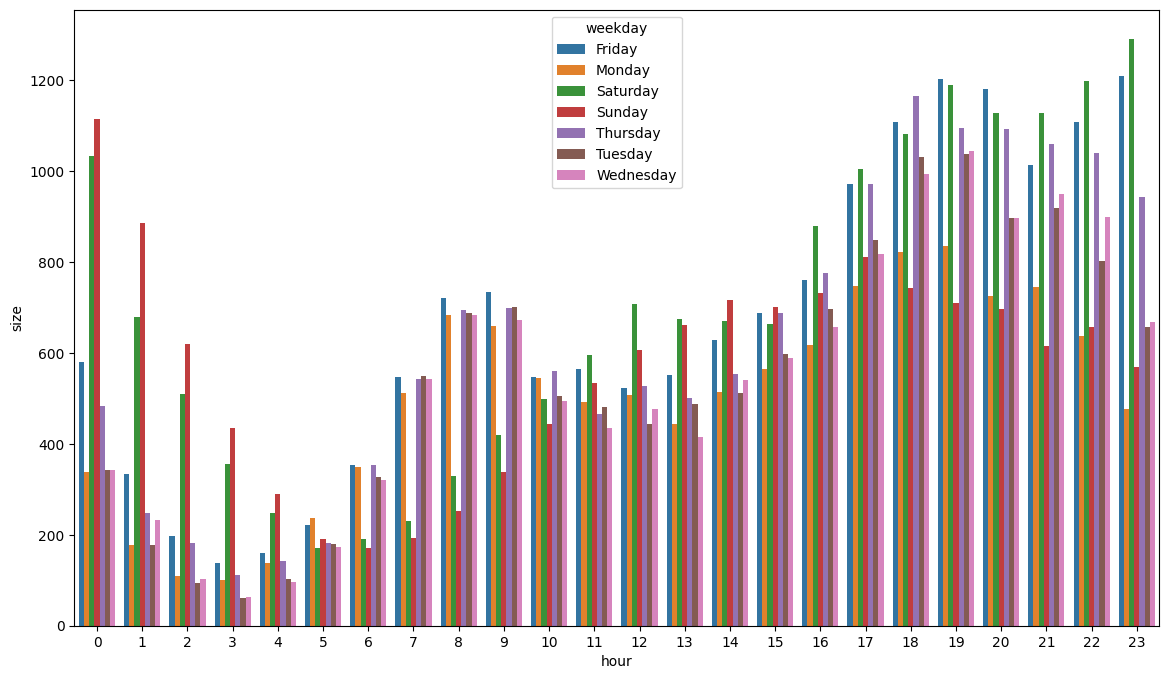

In [95]:
plt.figure(figsize=(14,8))
sns.barplot(summary,x="hour",y="size",hue="weekday")

It's interesting to see that Saturday and Sunday exhibit similar demand throughout the late night/morning/afternoon, 
but it exhibits opposite trends during the evening. In the evening, Saturday pickups continue to increase throughout the evening,
but Sunday pickups takes a downward turn after evening..

We can see that there the weekdays that has the most demand during the late evening is Friday and Saturday, 
which is expected, but what strikes me is that Thursday nights also exhibits very similar trends as Friday and Saturday nights.

It seems like New Yorkers are starting their 'weekends' on Thursday nights.